Importing Librarys


In [72]:
from matplotlib import pyplot as plt
import numpy as np
from scipy import optimize


Generating Data each type of Data Sepeartly in their own array

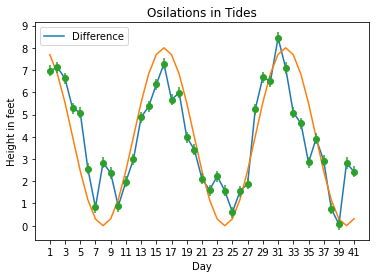

In [151]:

days= np.genfromtxt("./ASTR19_Data.txt",dtype=float,skip_header= 3,usecols=(0))
time = np.genfromtxt("./ASTR19_Data.txt",dtype=str,skip_header=3,usecols=(1))
measurement = np.genfromtxt("./ASTR19_Data.txt",dtype=float,skip_header=3,usecols=(2))

High = []
Low = []
HighLow = []
x = np.linspace(1,41,41)


for i in range(0,82,2):
    High.append(measurement[i])
for i in range (1,82,2):
    Low.append(measurement[i])
for i in range (len(High)):
    HighLow.append(High[i]-Low[i])


#Oscillatory Function
y = 4*np.cos(11/28*x)+4



#plt.plot(x,High,label = 'High')
#plt.plot(x,Low,label = 'Low')
plt.plot(x,HighLow,label ='Difference')
plt.plot(x,y)
plt.xlabel('Day')
plt.ylabel('Height in feet')
plt.title('Osilations in Tides')
plt.legend()
plt.yticks([-2,-1,0,1,2,3,4,5,6,7,8,9])
plt.xticks([1,3,5,7,9,11,13,15,17,19,21,23,25,27,29,31,33,35,37,39,41])

plt.errorbar(x,HighLow,yerr=0.25,fmt='o')


plt.show()

Oscillatory Function